# ¿Qué pasó en las elecciones?
HIPÓTESIS NO. 1: EL FACTOR CHI

Primera versión: 23 de Octubre de 2020 (en desarrollo)

<div style="text-align: right">Texto: Ana Lucía Velasco</div>
<div style="text-align: right">Análisis de datos: Diego Aliaga</div>
<div style="text-align: right">Edición: Huascar Morales, Yecid Aliaga, Nicole Aliaga</div>


In [32]:
# Importar librerías
from elec_bol20.nb_2020.z100_mas_chi2019_mas2020_fun import *

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import display, HTML
# from plotly.graph_objs import *
# import numpy as np
# init_notebook_mode(connected=True)

display(
    HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;    
}
</style>
"""))

Los resultados de las últimas elecciones presidenciales en Bolivia han generado mucha sorpresa en la población boliviana. Después de un final ajustado en el referéndum de la re-postulación del binomio Evo-Álvaro el año 2016 y de las controversiales elecciones nacionales del 2019, las expectativas sobre los resultados de las elecciones del 2020 eran muy altas. El margen de diferencia en el resultado final de las elecciones 2020 ha causado sorpresa. A pesar de esto, un breve análisis comparativo entre los datos oficiales de la elección del 2020 y la elección del 2019 arroja pistas interesantes que nos ayudan a entender mejor lo que pasó en las últimas elecciones.

La primera hipótesis que trataremos aquí es la que hemos denominado como “el factor CHI”.

In [2]:
# Tabla 1
df = get_df()
pd.DataFrame(df[['VV_20','VV_19','HAB_20','HAB_19']].sum(),columns=['VOTANTES'])

,VOTANTES
VV_20,5565388
VV_19,5682669
HAB_20,6625612
HAB_19,6757039


<center>Tabla 1: Número de votantes válidos (VV) y habilitados (hab) para este análisis. Solo utilizamos las mesas para las cuales el código de mesa no ha cambiado entre 2020 y 2019<center>

La siguiente información es obtenida realizando un análisis de clusters. Este análisis nos ha permitido comparar el comportamiento de las mesas de votación entre el 2019 y el 2020. Hemos juntado en grupos llamados “clusters” a las mesas que tuvieron un comportamiento similar para poder realizar la comparación que deseábamos. Estos cluster se los obtiene aplicado el método de
['KMeans'](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
Cada cluster agrupa a mesas donde la diferencia de votación 
que cada partido tuvo entre las elecciones del 2019 y las del 2020 es similar. Así, si el MAS hubiera obtenido 100% de votos en una mesa el año 2019 y 70% de votos en esa misma mesa el año 2020, tendríamos la diferencia 30%. Para aquellos partidos que participaron de las elecciones de 2019 pero no del 2020 la diferencia es igual al negativo del valor de 2019 y para los partidos que participaron de las elecciones del 2020 pero no en las del 2019 la diferencia es igual al valor de 2020. Los resultados de ese análisis se ven en la Tabla 1 y Fig. 1.

In [3]:
# Tabla 2
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
df1 = cluster_analysis(df=df)

nm_dic = df1.groupby(CLUS).count().iloc[:,0].to_dict()
nm_dic = {b:f'{b}\n$_{{({nm_dic[b]} \mathrm{{\ mesas}})}}$' for a,b in CLUS_DIC.items()}
mel = pd.melt(df1[[*COLUMNS_CLUS, CLUS]], id_vars=CLUS)
# mel[CLUS] = mel[CLUS].apply(lambda r: nm_dic[r])


mea = df1[[*COLUMNS_CLUS,CLUS]].groupby(CLUS).mean()
mea['SUM'] = mea.sum(axis=1)
mea.round()

,MAS20 - MAS19,CC20 - CC19,CRE20 - CRE19,21F20 - 21F19,CHI20 - CHI19,NB20 - NB19,SUM
Cluster,,,,,,,
++CRE,-1.0,-45.0,61.0,-10.0,-4.0,-3.0,-1.0
++MAS,22.0,-5.0,1.0,-2.0,-12.0,-5.0,0.0
+CC,-2.0,10.0,5.0,-5.0,-5.0,-3.0,-1.0
+CRE,2.0,-19.0,36.0,-10.0,-6.0,-4.0,-1.0
+MAS,8.0,0.0,2.0,-2.0,-6.0,-4.0,-1.0


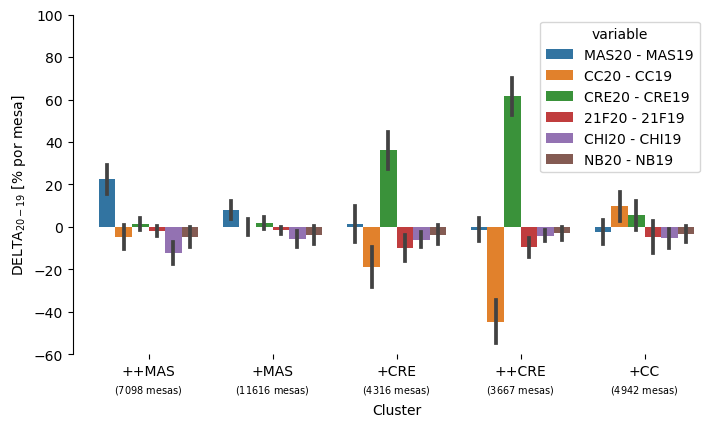

In [4]:
# Fig. 1
f, ax = plt.subplots(figsize=(8, 4.5), dpi=100)
sns.barplot(x=CLUS, y='value', data=mel, hue='variable',
            order=nm_dic.keys(), ci='sd');
ax.set_ylabel('$\mathrm{DELTA}_{20-19}$ [% por mesa]');

labs = ax.get_xticklabels()
labs = [matplotlib.text.Text(i.get_position(),text=nm_dic[i.get_text()]) for i in labs]
rr=ax.set_xticklabels(labs)
ax.set_ylim(-60,100)
sns.despine(ax=ax,offset=10,bottom=True)


<center>Fig. 1: Porcentaje del cambio de votos para cada mesa entre 2020 y 2019 por cluster.<center>

En este gráfico (Fig. 1) podemos ver lo siguiente: por debajo de la línea de 0, vemos el porcentaje de los votos que se perdieron el 2019; y por encima de la línea de cero, vemos a dónde fueron a parar estos votos. Es así que mostramos 5 casos interesantes. Los primeros dos casos son los de los clusters ++MAS y +MAS. El primero muestra cerca a 7 mil mesas de votación y el segundo cerca a 11 mil mesas. En el primer caso el MAS se beneficia de un gran número de votos de Chi, Carlos Mesa y votos nulos y blancos, en ese orden. Creemos parece beneficiarse de una cantidad pequeña de votos que quedaron cautivos por la retirada de la sigla del 21F (este es nuestro supuesto dada la afinidad política).

En los siguientes clusters +CRE y ++CRE podemos ver los casos en los que la agrupación Creemos a obtenido votos y de donde los obtuvo. Ambos clusters están compuestos de cerca a 8000 mesas de sufragio. En ambos casos vemos como antiguos votantes de CC, de 21F y de Chi, en ese orden, beneficiaron en mayor y abrumadora medida a Creemos y, en una pequeña minoría, al MAS. De estos datos podemos ver que aquellos votantes que se han desencantado con el MAS y decidieron dar su apoyo a CC o a Creemos sí existen, pero son casos excepcionales, el caso más común es el ex votante de Chi que decide dar su voto al MAS y ex votantes de CC que deciden dar su voto a Creemos.

Resumiendo: ¿Cómo cambió el voto entre el 2019 al 2020? Principalmente, el 7.30% de votación que perdió Chi el 2020 fue abrumadoramente hacia el MAS y en menor medida a Creemos, y en mucha menor medida a CC. El segundo cambio evidente es que Creemos recogió la votación de la agrupación 21F, poco de la votación de Chi y menos aún de votantes del MAS, pero logró atraer a un importante porcentaje del voto de CC. Podemos ver los siguientes datos en números absolutos en el siguiente gráfico y tabla (Fig. 2, Tabla 3).

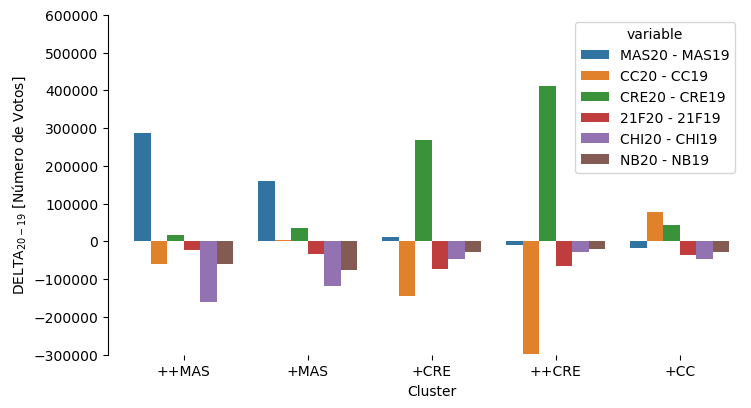

In [5]:
# Fig. 2
ds = df1.copy()
ds[COLUMNS_CLUS] = df1[COLUMNS_CLUS].multiply(df1['VV_20'], axis=0) / 100

mel1 = pd.melt(ds[[*COLUMNS_CLUS, CLUS]], id_vars=CLUS)
mel1 = mel1.groupby([CLUS, 'variable']).sum()



# noinspection PyRedeclaration
f, ax = plt.subplots(figsize=(8, 4.5), dpi=100)
sns.barplot(x=CLUS, y='value', data=mel1.reset_index(), hue='variable',
            order=CLUS_DIC.values(), hue_order=COLUMNS_CLUS);
ax.set_ylabel('$\mathrm{DELTA}_{20-19}$ [Número de Votos]');

ax.set_ylim(-300000,600000)
sns.despine(ax=ax,offset=10,bottom=True)


<center>Fig 2. Cambio de voto en valor absoluto para cada cluster mostrado en la Fig. 1.<center>

In [6]:
# Tabla 3
tab=mel1.round().astype(int)
tab=tab.reset_index().set_index([CLUS,'variable']).unstack()
tab['value'].T

Cluster,++CRE,++MAS,+CC,+CRE,+MAS
variable,,,,,
21F20 - 21F19,-63982,-22997,-37000,-73901,-32884
CC20 - CC19,-299389,-59438,78941,-143127,3725
CHI20 - CHI19,-28071,-159182,-46573,-46078,-117846
CRE20 - CRE19,411399,16375,42663,269498,36207
MAS20 - MAS19,-8199,287621,-17441,12238,159103
NB20 - NB19,-20275,-59886,-28450,-26609,-75796


<center>Tabla 3: Cantidad de votos mostrados en la Fig. 2.<center>

In [7]:
# Fig. 3
plot_clusters_carto(df1=df1);

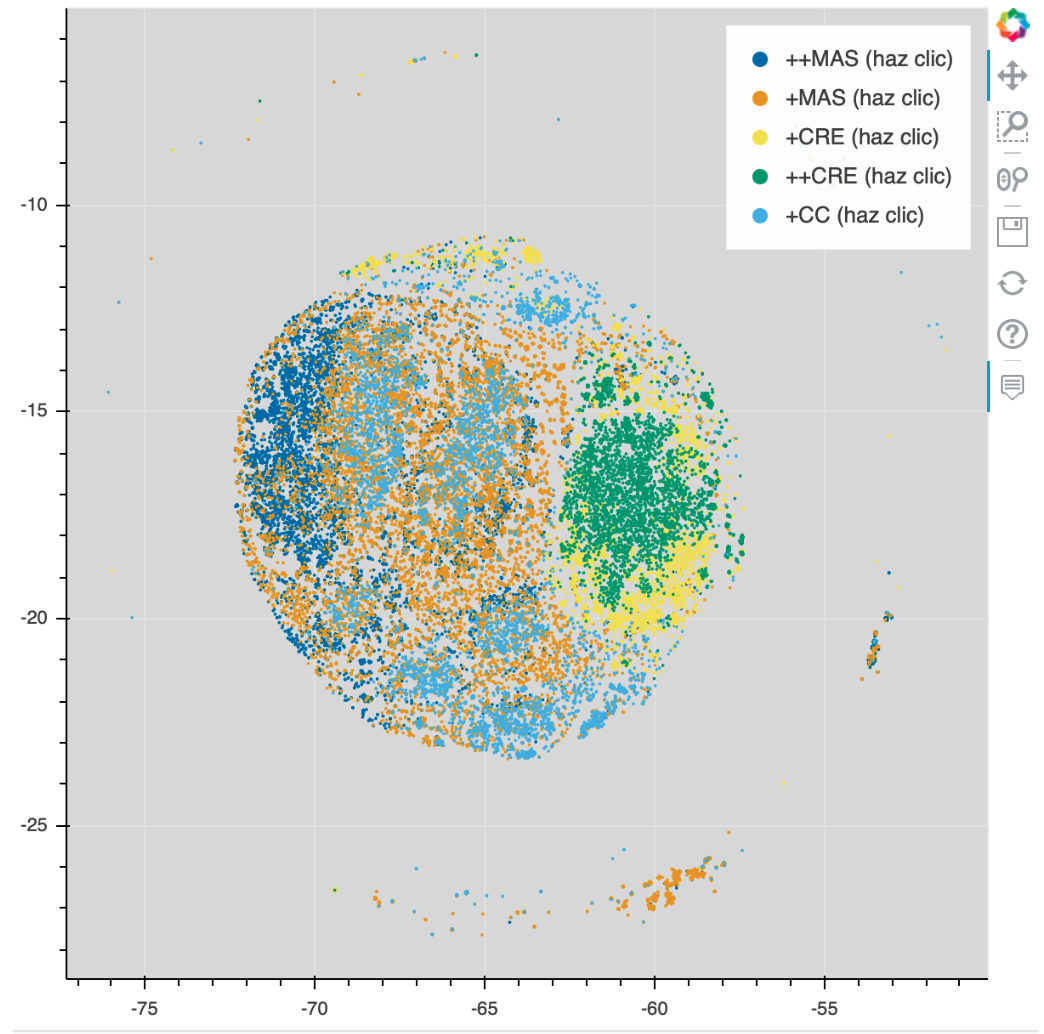

<center>Fig. 3: Posicionamiento de cada cluster en el cartograma de Bolivia descrito en <a href="https://ebol20.github.io/elec-bol20/Ejemplos/que_es_un_cartograma.html">ebol20</a>. Puedes hacer clic en la leyenda para desactivar cada grupo.<center>

Ahora veamos dónde se encuentran localizadas estas mesas en el mapa del país. El cluster ++MAS y +MAS se encuentran representados en color azul y naranja, respectivamente. Podemos ver que la mayoría de votos que ha ganado el MAS, provenientes de estos clusters, se encuentran en lugares como El Alto y La Paz, así como zonas periurbanas de las ciudades capitales de La Paz, Cochabamba, Sucre y Oruro, principalmente. 

El caso de los clusters de +CRE y ++CRE se encuentran representados en amarillo y verde. Aquí podemos ver que los cambios se han concentrado fundamentalmente en la ciudad de Santa Cruz y sus alrededores, así como algunos sectores del departamento de Pando. 

Finalmente, el cluster +CC puede encontrarse fundamentalmente en todas las ciudades capitales, en mayor o menor medida, salvo en Santa Cruz.

Si bien resulta evidente que la candidatura de Fernando Camacho y Marco Pumari significaron una importante merma de votos para los candidatos de Comunidad Ciudadana; aún así, este fenómeno no permite, por sí solo, explicar cómo el MAS logró subir tanto su porcentaje de votación en la reciente contienda electoral. El dato final del cómputo 2020 dejó sorprendidos a analistas y estrategas, parece ser que en los análisis vertidos hasta ahora se han estado olvidando del factor Chi.

PD: En las gráficas podemos ver que los votos nulos y blancos también jugaron un rol importante, que debe ser explicado aparte. Esto será expuesto en un siguiente artículo.

## Material complementario

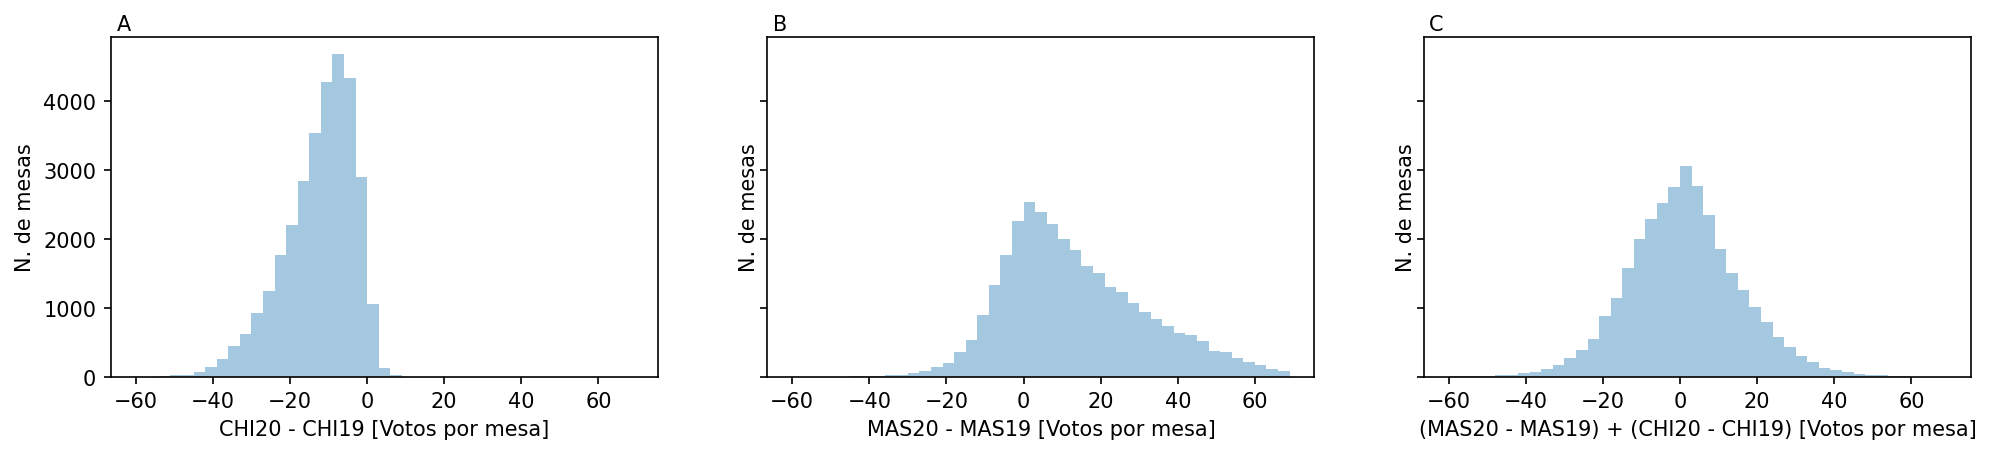

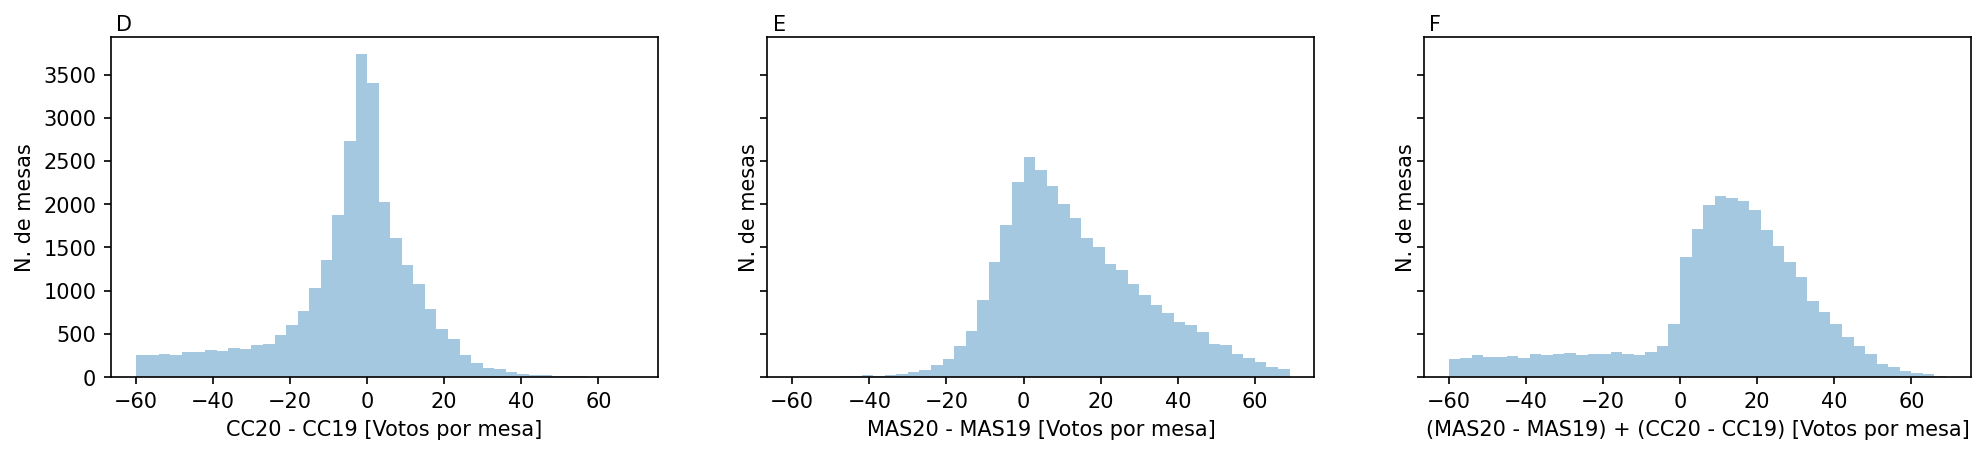

In [17]:
# Fig. 4
((df[DMAS_M_DCHI]*df['VV_20']/100).mean()).round()

((df[DMAS]*df['VV_20']/100).mean()).round()

(df['VV_20']).mean()


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pl_dic = {

    'A':{'a':DCHI,'b':DMAS,'c':DMAS_M_DCHI},
    'B':{'a':DCC,'b':DMAS,'c':DMAS_M_DCC},
#     'C':{'a':D21F,'b':DMAS,'c':DMAS_M_D21F},
}

i = 0
st = 'ABCDEF'
for a,A in pl_dic.items():
    a = A['a']
    b = A['b']
    c = A['c']

    _df = df[[a,b,c,'VV_20']].dropna(how='any')

    # noinspection PyTypeChecker
    f, axs = plt.subplots(1, 3, figsize=[16, 3], sharex=True, sharey=True, dpi=150)
    axf = axs.flatten()
    def _pl(ax,a,t):
        bs = np.arange(-60,71,3)
        sns.distplot(_df[a]*_df['VV_20']/100, ax=ax,
#                      hist_kws={'weights':_df['HAB_20']*np.abs(_df[a])},
                     kde=False,
                    bins=bs)
        ax.set_ylabel('N. de mesas')
        ax.set_xlabel(ax.get_xlabel() + f'{a} [Votos por mesa]')
        ax.text(0.01,1.02,t,transform=ax.transAxes)
    _pl(axf[0],a,st[i]);i=i+1
    _pl(axf[1],b,st[i]);i=i+1
    _pl(axf[2],c,st[i]);i=i+1

<center>Fig. 4: Panel A muestra un histograma de diferencias de voto por mesa entre 2020 y 2019 para CHI. El panel B hace lo mismo para MAS. El panel C es el resultado de (MAS20-MAS19) + (CHI20-CHI19). Los paneles  D, E y F muestran lo mismo que A, B y C pero para CC y MAS.
sasdf
    <center>

En la Fig. 4, se puede apreciar la diferencia de la cantidad de votos que recibió Chi el año 2020 y 2019. A la izquierda del punto medio marcado por el cero se muestra donde perdió votos, y a la derecha, los votos ganados por Chi el año 2020. Al lado (B), hacemos el mismo ejercicio para el MAS. En el tercer panel (C) sobreponemos las diferencias de votos sacados entre el 2019 y el 2020 por ambos candidatos y podemos apreciar que se equilibran entre sí. En otras palabras el promedio y la media de B es 14 votos por mesa mientras que el promedio de C es 1 voto por mesa. Es decir, la perdida de CHI llega a explicar 13 de los 14 votos ganados por MAS.
Hemos repetido el mismo ejercicio para CC y el MAS, en la segunda línea de gráficos. Aquí podemos ver que al comparar los votos obtenidos por el MAS y CC tanto el 2019 como en el 2020, ambos no se equilibran entre sí. Esto demuestra que la diferencia de la votación del MAS obtenida este año, en comparación a la obtenida el año pasado se explica mucho mejor por una migración de votos de Chi al MAS, que por una migración de votos de CC al MAS.



In [9]:
# Fig. A 1
plot_3_comparison(df=df);

Loading BokehJS ...